Cross-validation scores: [0.985 0.985 1.    0.99  1.   ]
Mean CV score: 0.992


c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


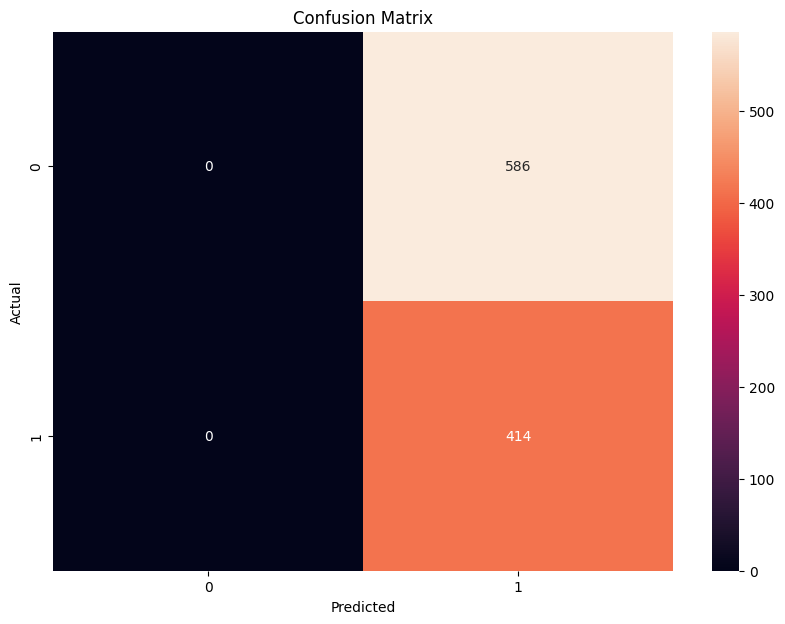

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       586
           1       0.41      1.00      0.59       414

    accuracy                           0.41      1000
   macro avg       0.21      0.50      0.29      1000
weighted avg       0.17      0.41      0.24      1000



c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

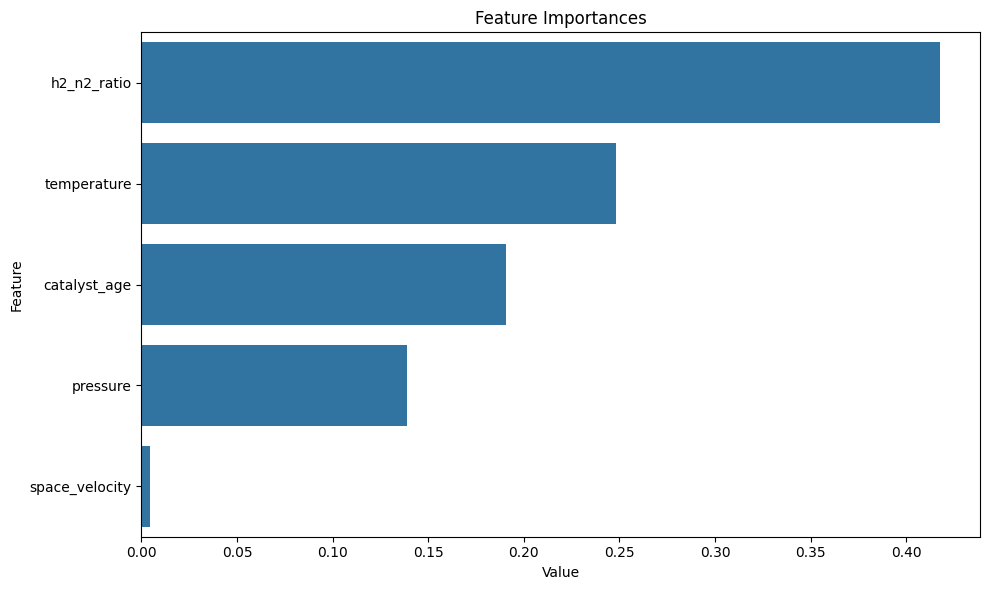

Class distribution:
fault
0    0.586
1    0.414
Name: proportion, dtype: float64


In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joblib import dump, load
fault_model=load("fault_model.joblib")
data=pd.read_csv("haber_bosch_dataset1.csv")
x=data[['temperature', 'pressure', 'h2_n2_ratio', 'catalyst_age', 'space_velocity']]
y_conversion = data['conversion']
y_fault = data['fault']
x_train, x_test, y_conv_train, y_conv_test, y_fault_train, y_fault_test = train_test_split(x, y_conversion, y_fault, test_size=0.2, random_state=42)


# Assuming you have your model, X, and y_fault from earlier

# Cross-validation
cv_scores = cross_val_score(fault_model, x, y_fault, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Confusion Matrix
y_pred = fault_model.predict(x)
cm = confusion_matrix(y_fault, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_fault, y_pred))

# Feature Importance (if using a tree-based model like Random Forest)
if hasattr(fault_model, 'feature_importances_'):
    importances = fault_model.feature_importances_
    feature_imp = pd.DataFrame(sorted(zip(importances, x.columns)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

# Class distribution
print("Class distribution:")
print(y_fault.value_counts(normalize=True))

Cross-validation scores: [1.    0.999 1.    0.998 1.   ]
Mean CV score: 0.9994


c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


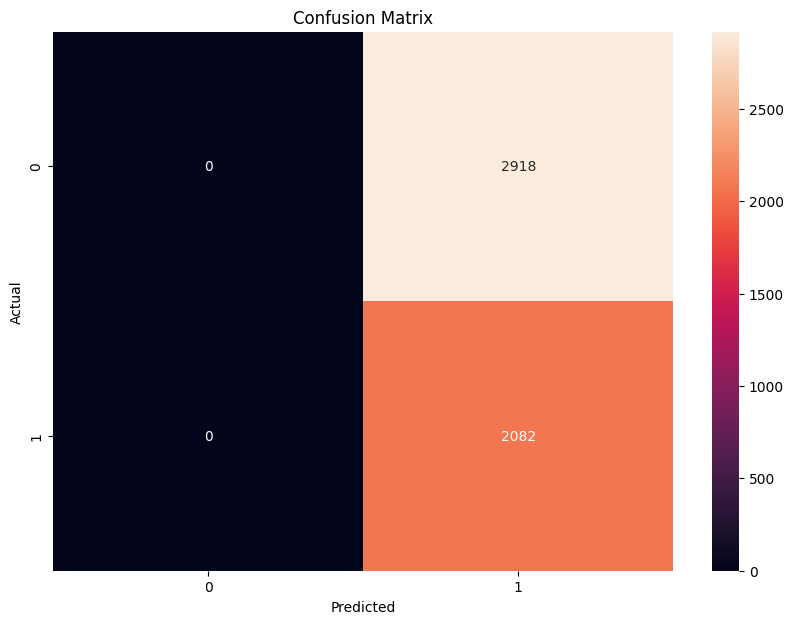

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2918
           1       0.42      1.00      0.59      2082

    accuracy                           0.42      5000
   macro avg       0.21      0.50      0.29      5000
weighted avg       0.17      0.42      0.24      5000



c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aprit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

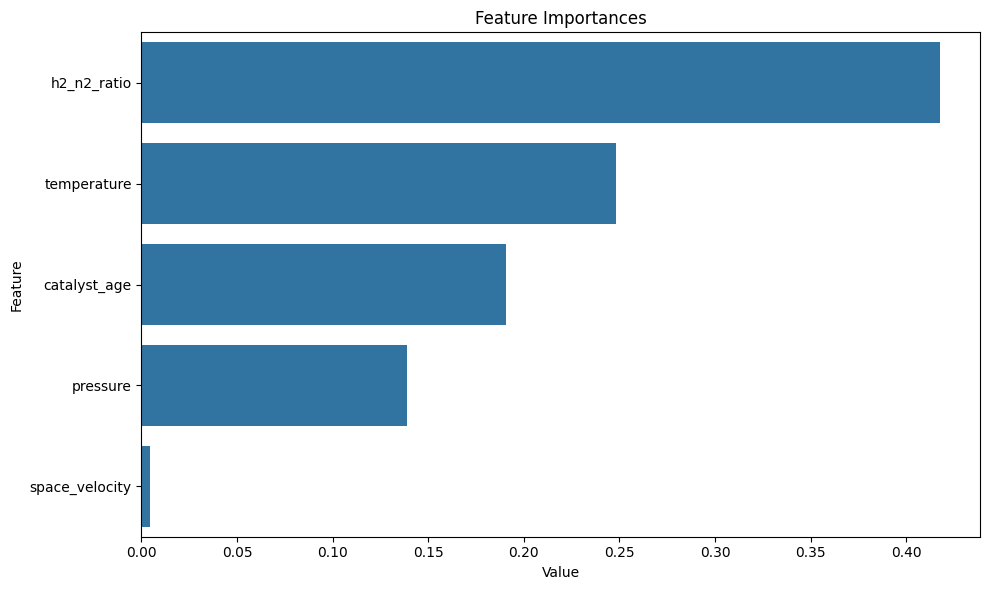

Class distribution:
fault
0    0.5836
1    0.4164
Name: proportion, dtype: float64


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
fault_model=load("fault_model.joblib")
data=pd.read_csv("haber_bosch_dataset.csv")
x=data[['temperature', 'pressure', 'h2_n2_ratio', 'catalyst_age', 'space_velocity']]
y_conversion = data['conversion']
y_fault = data['fault']
x_train, x_test, y_conv_train, y_conv_test, y_fault_train, y_fault_test = train_test_split(x, y_conversion, y_fault, test_size=0.2, random_state=42)


# Assuming you have your model, X, and y_fault from earlier

# Cross-validation
cv_scores = cross_val_score(fault_model, x, y_fault, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Confusion Matrix
y_pred = fault_model.predict(x)
cm = confusion_matrix(y_fault, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_fault, y_pred))

# Feature Importance (if using a tree-based model like Random Forest)
if hasattr(fault_model, 'feature_importances_'):
    importances = fault_model.feature_importances_
    feature_imp = pd.DataFrame(sorted(zip(importances, x.columns)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

# Class distribution
print("Class distribution:")
print(y_fault.value_counts(normalize=True))